## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

In [24]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

/Users/johnjordan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Q1. 

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents. 

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [15]:
phishing = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')

In [16]:
phishing.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [17]:
phishing['Email Type'] = phishing['Email Type'].str.split()

In [19]:
phishing['Email Text'] = phishing['Email Text'].str.split()

In [20]:
phishing.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian...","[Safe, Email]"
1,1,1,"[the, other, side, of, *, galicismos, *, *, ga...","[Safe, Email]"
2,2,2,"[re, :, equistar, deal, tickets, are, you, sti...","[Safe, Email]"
3,3,3,"[Hello, I, am, your, hot, lil, horny, toy., I,...","[Phishing, Email]"
4,4,4,"[software, at, incredibly, low, prices, (, 86,...","[Phishing, Email]"


To clean the data, I would remove all white space and spaces from the values in the lists. From there, for the column Email Type, I would select only the first value each of the lists, either Phishing or Safe, because the second value is always Email. From there, I would replace all instances of 'Safe' with a value of 0, and all instances of 'Phishing' with a 1. For the Email Text column, I would use NLTK stop words to remove all stop words such as 'the'. From there I would use one-hot encoding to assign values to each of the words in each email and run a linear regression from there to predict whether or not an email would be a scam.

### Q2. 

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [27]:
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

In [30]:
tokens_df = pd.DataFrame(token_freq, columns= ['token', 'count'])

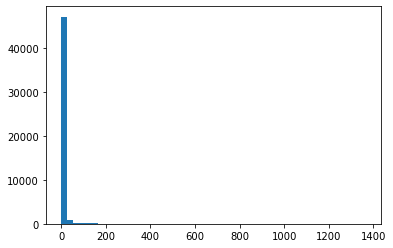

In [35]:
plt.hist(tokens_df['count'], bins=50)
plt.show()

One thing that I noticed was that a majority of the tokens fell in the same bin of frequency, and then there were a few other tokens that appeared far less frequently. This makes me think that the tokens that are less frequent will likely be more helpful in predicting whether an email is phishing or not, because there are far less instances of them across all emails, however, if they only appear a handful of times then they won't be very helpful.

### Q3. 

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions? 

In [40]:
clean = pd.read_parquet('/Users/johnjordan/Desktop/DS 3001/Phishing_clean.parquet')

In [45]:
clean.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train test split

In [43]:
y = clean['Email Type']
x = clean.drop('Email Type', axis=1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 125)

In [46]:
lm = LinearRegression(fit_intercept=False).fit(x_train, y_train)

Look at R2 scores

In [50]:
y_hat_test = lm.predict(x_test)

In [49]:
y_hat_train = lm.predict(x_train)

In [51]:
print("train: ", r2_score(y_hat_train, y_train))

train:  0.6210885827789516


In [52]:
print("test: ", r2_score(y_hat_test, y_test))

test:  -0.0002683843270245845


Look at coefficients

In [56]:
features = pd.DataFrame({'variable':x.columns , 'value':lm.coef_})
features['abs'] = np.abs(features['value'])
features.sort_values('abs',ascending=False)

,variable,value,abs
40,2000,5.493473e+12,5.493473e+12
1721,"06,",-5.433080e+12,5.433080e+12
74,"2002,",5.404822e+12,5.404822e+12
2217,0500,-4.184498e+12,4.184498e+12
33,2001,3.555491e+12,3.555491e+12
...,...,...,...
989,greg,1.024008e-04,1.024008e-04
2415,usually,6.562471e-05,6.562471e-05
1321,context,5.918741e-05,5.918741e-05
2432,showing,4.005432e-05,4.005432e-05


The variables with the most predictive power are a bunch of numbers.

### Q4. 

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [57]:
pca_0 = PCA(n_components= 2).fit(x_train)

In [58]:
z_train = pca_0.transform(x_train)

In [61]:
z_test = pca_0.transform(x_test)

<AxesSubplot:>

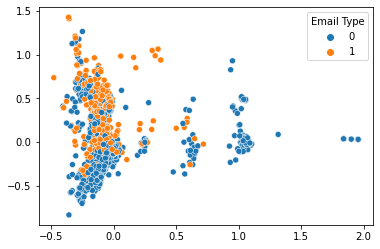

In [63]:
sns.scatterplot(x=z_test[:,0],y=z_test[:,1],hue=y_test)

One thing that I noticed was that most of the scam emails can be found left of 0.5 on the x-axis and aboive -0.5 on the y-axis.

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [68]:
pca_1 = PCA(n_components=2610).fit(x_train)

In [69]:
z_train = pca_1.transform(x_train)

In [70]:
z_test = pca_1.transform(x_test)

In [72]:
lm_pca = LinearRegression().fit(z_train, y_train)

In [74]:
y_hat_train = lm_pca.predict(z_train)

In [75]:
y_hat_test = lm_pca.predict(z_test)

In [77]:
print("r2 train: ", r2_score(y_hat_train, y_train))
print("r2 train: ", r2_score(y_hat_test, y_test))

r2 train:  0.6928975360963747
r2 train:  0.5873905973217177


This model performs significantly better than the linear regression on the test data and slightly better on the training data.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

PCA does better when running this type of high dimensional analysis because it helps solve for any multicollinearity problems. 